# Mínimos cuadrados con penalización por norma $\ell_1$ y $\ell_2$

Tarea de regresión con datos sintéticos.

Carga NumPy, matplotlib's pyplot y clases para regresión lineal de sklearn

In [1]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Función para expansión polimonial

In [2]:
# función para expansión en funciones base
def polynomial_expansion(x, degree):
    phi_x = x
    for i in range(degree - 1):
        powerx = np.power(x, i + 2)
        phi_x = np.concatenate((phi_x,powerx), axis=1)
    return phi_x

In [6]:
# crea matriz de diseño
def design_matrix(X, degree = 1):
    phi_X = polynomial_expansion(X, degree)
    ones = np.ones(X.shape[0])
    phi_X = np.column_stack((ones, phi_X))

    return phi_X

In [8]:
# sse = sum_{i=1}^n (y - y_hat)^2
def sse(y, y_hat):
    return np.square(y - y_hat).sum()

In [10]:
# clase base para regresión lineal
class MinimosCuadrados:
    # estima los parámetros del modelo de regresión lineal dados los datos
    def fit(self, X, y):
        self.parameters = np.dot(np.linalg.inv(np.dot(X.T, X)), 
                                 np.dot(X.T, y))

    # predice valores de vectores dados
    def predict(self, X):
        return np.dot(X, self.parameters)
    
    def evaluate(self, X, y):
        y_hat = self.predict(X)
        sse = sse(y, y_hat)
        mse = self.sse / X.shape[0]
        
        return y_hat, sse, mse

Datos de entrenamiento y validación

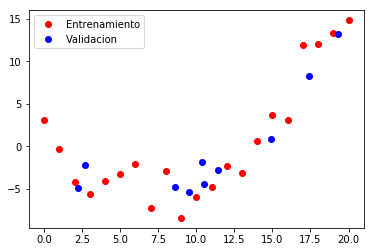

In [3]:
x_train = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
               11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
x_train = x_train[:,np.newaxis]
y_train = np.array([3.10341864, -0.36949342, -4.20684311, -5.61381536,
                    -4.09482862, -3.23548442, -2.12902581, -7.28955698,
                    -2.8821206, -8.44323436, -5.9491123, -4.77948529,
                    -2.34705651, -3.11360479, 0.58915552, 3.66236699,
                    3.14385906, 11.92541392, 12.06829608, 13.37635698, 14.84302011])

x_valid = np.array([2.2, 2.7, 8.6, 9.5, 10.4, 10.5, 11.4, 14.9, 17.4, 19.3])
x_valid = x_valid[:,np.newaxis]
y_valid = np.array([-4.87830149, -2.22417664, -4.78937076, -5.39555669,
                    -1.89941084, -4.39873376, -2.74141712, 0.86251019,
                    8.2396395, 13.25506972])

# datos en rango de valores para graficar modelos
x_range = np.linspace(0, 20, 10000)
x_range = x_range[:,np.newaxis]

# grafica datos
train_plot = plt.plot(x_train, y_train, 'ro', label = 'Entrenamiento')
valid_plot = plt.plot(x_valid, y_valid, 'bo', label = 'Validacion')
plt.legend()
plt.show()

### Mínimos cuadrados sin expansión polinomial

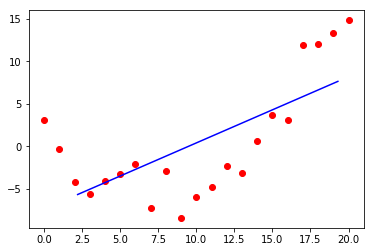

In [4]:
# expande atributo con función base polinomial grado 1
phi_x_train = polynomial_expansion(x_train,1)
# crea matríz de diseño
ones_train = np.ones((x_train.shape[0],1))
phi_x_train = np.concatenate((ones_train, phi_x_train), axis=1)

# estima parámetros por mínimos cuadrados
# w = (XT X)-1 XT t
theta_ml = np.dot(np.linalg.inv(np.dot(np.transpose(phi_x_train), phi_x_train)), 
                  np.dot(np.transpose(phi_x_train), y_train))
y_train_hat = np.dot(phi_x_train,theta_ml)

# predice para rango de valores
phi_x_valid = polynomial_expansion(x_valid,1)
ones_valid = np.ones((x_valid.shape[0],1))
phi_x_valid = np.concatenate((ones_valid, phi_x_valid), axis=1)
y_valid_hat = np.dot(phi_x_valid, theta_ml)

# grafica resultados
plt.plot(x_train, y_train, 'ro')
plt.plot(x_valid, y_valid_hat, 'b')
plt.show()

### Mínimos cuadrados con expansión polinomial grado 2

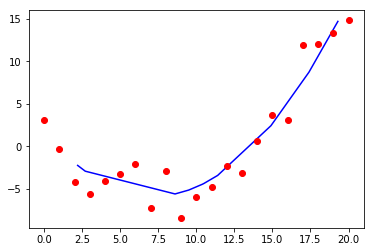

In [5]:
# expande atributo con función base polinomial grado 1
phi_x_train = polynomial_expansion(x_train,2)
phi_x_train = np.concatenate((ones_train, phi_x_train), axis=1)
theta_ml = np.dot(np.linalg.inv(np.dot(np.transpose(phi_x_train), phi_x_train)), 
              np.dot(np.transpose(phi_x_train), y_train))
y_train_hat = np.dot(phi_x_train,theta_ml)
phi_x_valid = polynomial_expansion(x_valid,2)
phi_x_valid = np.concatenate((ones_valid, phi_x_valid), axis=1)
y_valid_hat = np.dot(phi_x_valid, theta_ml)
plt.plot(x_valid, y_valid_hat, 'b')
plt.plot(x_train, y_train, 'ro')
plt.show()